# Nearest Neighbor Classifier

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 3.1 Exploring the Data

In [2]:
# load dataset from from sklearn
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.keys())

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


In [39]:
print(type(digits))
print(digits.data.shape)
print(digits.data.dtype)
print(digits.target.shape)

<class 'sklearn.utils.Bunch'>
(1797, 64)
float64
(1797,)


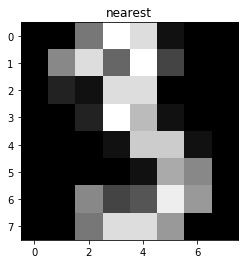

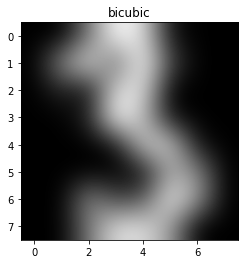

In [32]:
# visualize one image of a 3
def show_a_3(digits):
    n = digits.target.shape[0]
    for i in range(n):
        # find an image of number 3
        if digits.target[i] == 3:
            plt.figure()
            plt.gray()
            plt.imshow(digits.images[i], interpolation="nearest")
            plt.title("nearest")
            plt.show()
            plt.imshow(digits.images[i], interpolation="bicubic")
            plt.title("bicubic")
            plt.show()
            return

show_a_3(digits)

## 3.2 Distance function  computation using loops

In [37]:
def dist_loop(training, test):
    """
    calculate the distance between instances in test set and training set
    Args:
        training: N*D matrix, and D is the number of pixels in one image
        test: M*D matrix
    Returns:
        distances: N*M matrix, and distances[i][j] is the distance between training[i] and test[j]
    """
    N = training.shape[0]
    M = test.shape[0]
    distances = np.zeros((N,M))
    for i in range(N):
        for j in range(M):
            vec_i = training[i]
            vec_j = test[j]
            distances[i][j] = np.linalg.norm(np.subtract(vec_i, vec_j))
    return distances
    

[[1.73205081 1.73205081 1.73205081]
 [1.73205081 1.73205081 1.73205081]]


## 3.3 Distance function computation using vectorization

In [61]:
# todo
def dist_vec(training, test):
    return dist_loop(training, test)

## 3.4 Implement K-Nearest Neighbor classifier

In [59]:
from sklearn import model_selection
X_all = digits.data
Y_all = digits.target
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X_all, Y_all, test_size=0.2, random_state=0)

In [64]:
def init_dict():
    dct = dict()
    for i in range(10):
        dct[i] = 0
    return dct

def pick_highest_freq(dct):
    index = 0
    maximum = 0
    for i in range(10):
        if dct[i]>maximum:
            index = i
            maximum = dct[i]
    return index


def arg_topK(distances, K, axis=0):
    """
    Args:
        distances: N*M
        K
        axis
    Returns:
        topK: K*M matrix, and topK[:, j]: the top K nearest neighbor of test[j]
    """
    full_sort = np.argsort(distances, axis)
    return full_sort.take(np.arange(K), axis)

def KNN_classifier(X_train, X_test, Y_train, Y_test, K):
    # compute the distance matrix
    distances = dist_vec(X_train, X_test)  # distances[i][j]: distance of test[j] to train[i]
    # select top K nearest neighbors of every test image in the training set
    topK = arg_topK(distances, K, axis=0)  # topK: matrix K*M
    Y_pred = np.zeros(Y_test.shape)
    for i in range(Y_test.shape[0]):
        nearest_neighbors = topK[:, i] # nearest neighbors of test[i]
        # pick the most frequently appeared number as prediction
        dct = init_dict()
        for index in nearest_neighbors:
            y = Y_train[index]
            dct[y] = dct[y] + 1
        Y_pred[i] = pick_highest_freq(dct)
    return Y_pred


def cal_err(Y_test, Y_pred):
    return np.sum(np.subtract(Y_test, Y_pred)!=0)/Y_pred.size

def test(K):
    Y_pred = KNN_classifier(X_train, X_test, Y_train, Y_test, K)
    err = cal_err(Y_test, Y_pred)
    print(err)

test(3)
test(5)
test(11)
test(30)

0.016666666666666666
0.025
0.027777777777777776
0.041666666666666664
